In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
marks=pd.read_csv('marks.csv')

In [3]:
marks

,exam1,exam2,admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1
...,...,...,...
95,83.489163,48.380286,1
96,42.261701,87.103851,1
97,99.315009,68.775409,1
98,55.340018,64.931938,1


In [4]:
marks.describe()

,exam1,exam2,admitted
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


In [5]:
marks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   exam1     100 non-null    float64
 1   exam2     100 non-null    float64
 2   admitted  100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


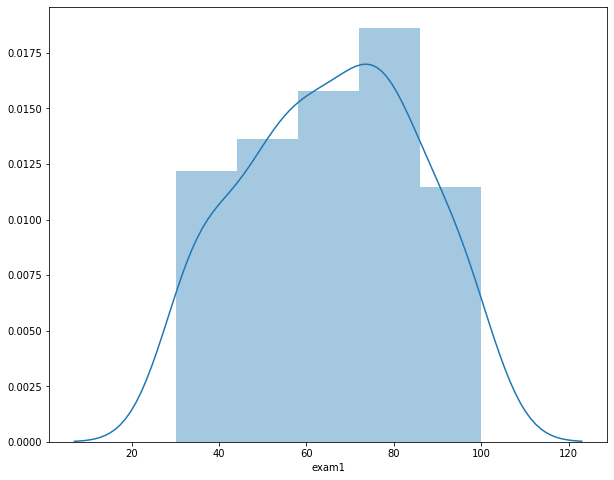

In [11]:
#no missing values
#let's do some EDA [exploratory data analysis]
plt.figure(figsize=(10,8))
sns.distplot(marks['exam1'],bins=5)

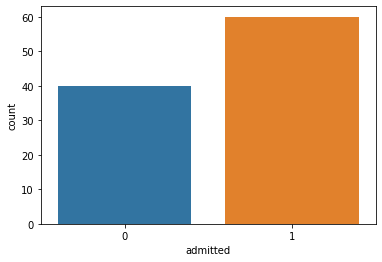

In [16]:
#most of the students have scored in the range of 60-80 , or 70-80 to be more precise
sns.countplot(x='admitted',data=marks)

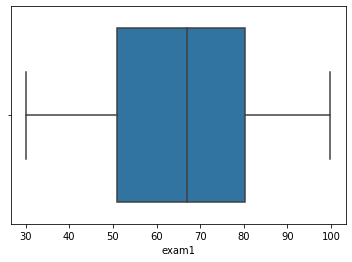

In [18]:
#40 have been rejected and 60 have been admitted.
sns.boxplot(x='exam1',data=marks)

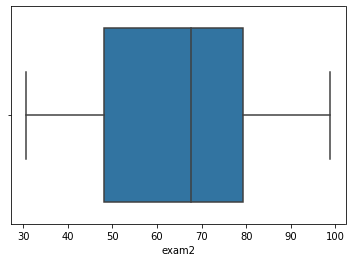

In [19]:
sns.boxplot(x='exam2',data=marks)

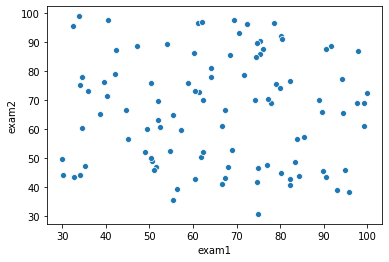

In [23]:
sns.scatterplot(x='exam1',y='exam2',data=marks)

In [24]:
#well there is no definite relation between exam1 scores and exam2 scores 
#students who performed poorly in exam1 , have scored better in exam2! students who did well in exam1 have also messed
#in exam2

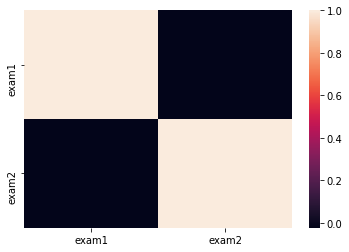

In [26]:
sns.heatmap(marks[['exam1','exam2']].corr())

In [27]:
#another proof that exam exam1 marks and exam2 marks have no good correlation!

In [28]:
#LOGISTIC REGRESSION
#to predict 'y' = 'admitted'
y=marks['admitted']
X=marks[['exam1','exam2']]

In [29]:
y

0     0
1     0
2     0
3     1
4     1
     ..
95    1
96    1
97    1
98    1
99    1
Name: admitted, Length: 100, dtype: int64

In [30]:
X

,exam1,exam2
0,34.623660,78.024693
1,30.286711,43.894998
2,35.847409,72.902198
3,60.182599,86.308552
4,79.032736,75.344376
...,...,...
95,83.489163,48.380286
96,42.261701,87.103851
97,99.315009,68.775409
98,55.340018,64.931938


In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [34]:
X_train

,exam1,exam2
28,61.830206,50.256108
93,74.492692,84.845137
5,45.083277,56.316372
66,40.457551,97.535185
65,66.560894,41.092098
...,...,...
60,75.395611,85.759937
71,64.039320,78.031688
14,39.538339,76.036811
92,55.482161,35.570703


In [35]:
y_train

28    0
93    1
5     0
66    1
65    0
     ..
60    1
71    1
14    0
92    0
51    1
Name: admitted, Length: 67, dtype: int64

In [36]:
from sklearn.linear_model import LogisticRegression

model=LogisticRegression()

In [37]:
model.fit(X_train,y_train)

LogisticRegression()

In [38]:
pred=model.predict(X_test)

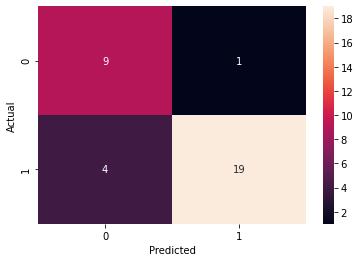

In [39]:
confusion_matrix = pd.crosstab(y_test, pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

In [40]:
from sklearn.metrics import accuracy_score

In [41]:
print(accuracy_score(y_test,pred))

0.8484848484848485


In [42]:
#accuracy = 84.848484848% = 19+9/(19+9+4+1)
28/(28+5)

0.8484848484848485

In [43]:
#let's try to make few predictions
model.predict([[100,100]])

array([1])

In [44]:
model.predict([[50,100]])

array([1])

In [46]:
model.predict([[55,50]])

array([0])

In [47]:
model.predict([[45,99]])

array([1])